In [2]:
import torch
import numpy as np
from dptb.nn.dftb2nnsk import DFTB2NNSK
import matplotlib.pyplot as plt
from dptb.entrypoints.collectskf import skf2nnsk
from dptb.nn.build import build_model
from dptb.utils.tools import j_loader
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
import json

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.


In [1]:
# 从 Baseline model 提取目标模型
!dptb esk ./confs/hBN_spd.json

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

CUDA is not available. The model will be loaded on CPU.
/Users/aisiqg/Desktop/work/github/DeePTB/.venv/lib/python3.10/site-packages/torch/nested/__init__.py:107: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/NestedTensorImpl.cpp:180.)
  return torch._nested_tensor_from_tensor_list(ts, dtype, None, device, None)
eig_solver is not set, using default 'torch'.


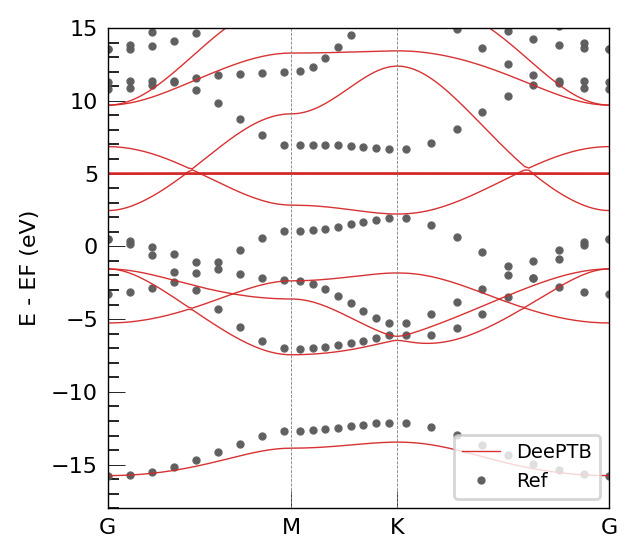

In [3]:
model = build_model('./sktb.json')
# not the no_check=True, which is used to skip the check of the model options. 
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)

 **Q: 你会发现上面的能带怎么 在 5 eV 附近有一个平的带呢？**

**A: 这是因为我们默认的采用的轨道是spd。 对于 h-BN d orbital 全部为的所有hopping， onside 全部0 是无效信息。**

请看我们前面导出base model时用的参数, 可以看到采用了 s p d 轨道。

In [4]:
!cat ./confs/hBN_spd.json

{
    "common_options": {
        "basis": {
            "B": ["s","p","d"],
            "N": ["s","p","d"]
        }
    }
}

我们可以手动指定轨道信息改为 sp 

In [6]:
!cat ./confs/hBN_sp.json

# 从 Baseline model 提取目标模型
!dptb esk ./confs/hBN_sp.json

{
    "common_options": {
        "basis": {
            "B": ["s","p"],
            "N": ["s","p"]
        }
    }
}TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░

CUDA is not available. The model will be loaded on CPU.
eig_solver is not set, using default 'torch'.


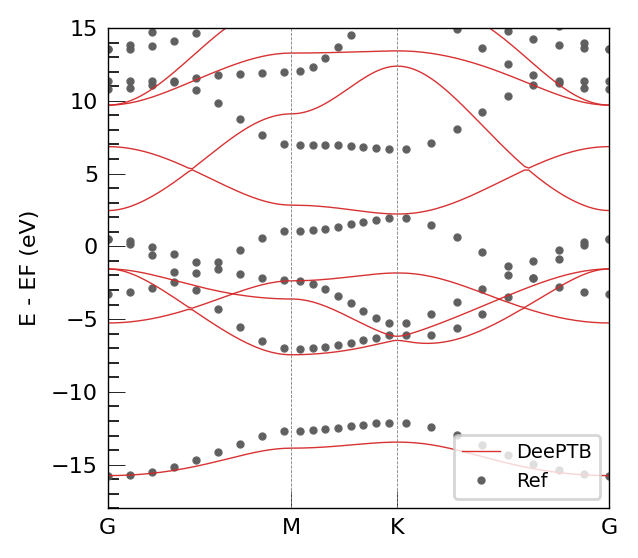

In [7]:
model = build_model('./sktb.json')
# not the no_check=True, which is used to skip the check of the model options. 
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)
